# Telecom Company Analysis

### Problem: To reduce Churn Rate

This Telecom's Churn Dataset, consists of cleaned customer activity data, along with a churn label specifying whether the customer cancelled the subscription.

I have explored and analyzed the data to discover key factos responsible for customer churn and came up with ways to ensure customer retention.

### Business Understanding of a Telecom Industry Customer Churn:

Customer churn is a big problem in any industry and one of the most important concern for the telecom industry.

The effect on the revenues of the companies is huge, because of this customer churn, especially in the telecom field, that's why these companies are seeking to develop a predictive potential customer churn.

In this highly competitive market, the telecommunication industry experiences an average of 15-20% annual churn rate, and it costs 5 times more to acquire a new customer than to retain an existing one, that's why customer retention has now become even more important than customer acquisition.

Therefore, finding those factors that increase customer churn is imporant to take necessary actions to reduce the churn.

##### The main goal of my project is to develop an understanding of the cause of customer churn which assists telecom operators to predict customers who are more likely subject to churn, and what to do to retain the most valuable customer.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv(r"D:\downloads\file.csv")

In [4]:
pd.set_option('display.max_columns', None)

In [3]:
df.head(2)

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.7,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.7,1,False


In [5]:
df.shape

(3333, 21)

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [7]:
df.nunique()

state                       51
account length             212
area code                    3
phone number              3333
international plan           2
voice mail plan              2
number vmail messages       46
total day minutes         1667
total day calls            119
total day charge          1667
total eve minutes         1611
total eve calls            123
total eve charge          1440
total night minutes       1591
total night calls          120
total night charge         933
total intl minutes         162
total intl calls            21
total intl charge          162
customer service calls      10
churn                        2
dtype: int64

In [8]:
df.isnull().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

In [9]:
df[df.duplicated()]

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn


In [54]:
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [56]:
df.describe(include='object')

,state,phone number,international plan,voice mail plan
count,3333,3333,3333,3333
unique,51,3333,2,2
top,WV,382-4657,no,no
freq,106,1,3010,2411


### 1. Analyzing the 'Churn' column

In [113]:
churn_data = df['churn'].value_counts()

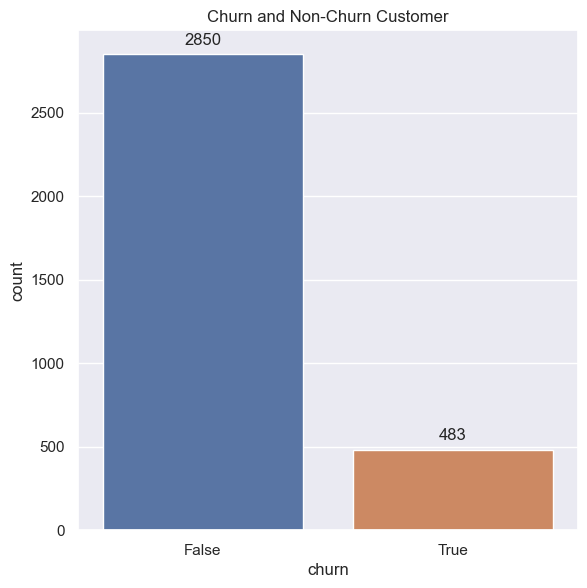

In [117]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_axes([0,0,1,1])

x = sns.countplot(x=df['churn'])

for p in x.patches:
    x.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 10), 
                textcoords='offset points')

plt.title('Churn and Non-Churn Customer')

plt.show()

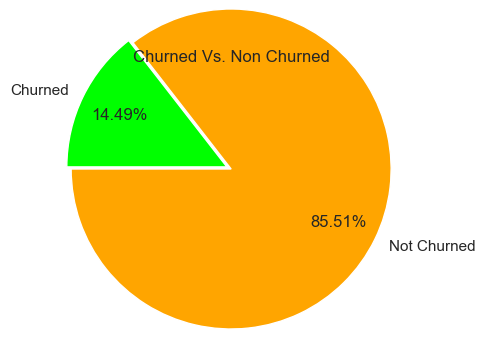

In [63]:
fig = plt.figure(figsize=(2,5))
ax = fig.add_axes([0,0,1,1])

plt.pie(churn_data, labels=['Not Churned', 'Churned'], colors=['orange', 'lime'], startangle=180,
        radius=2, explode=(0,0.06), autopct='%1.2f%%', pctdistance=0.75)

plt.title('Churned Vs. Non Churned')

plt.show()

##### Conclusion

After analyzing the Churn column, I have noticed that almost 15% customer have churned. Now, I will analyze other columns to find out the possible reason for this churn.

### 2. Analyzing the 'State' column

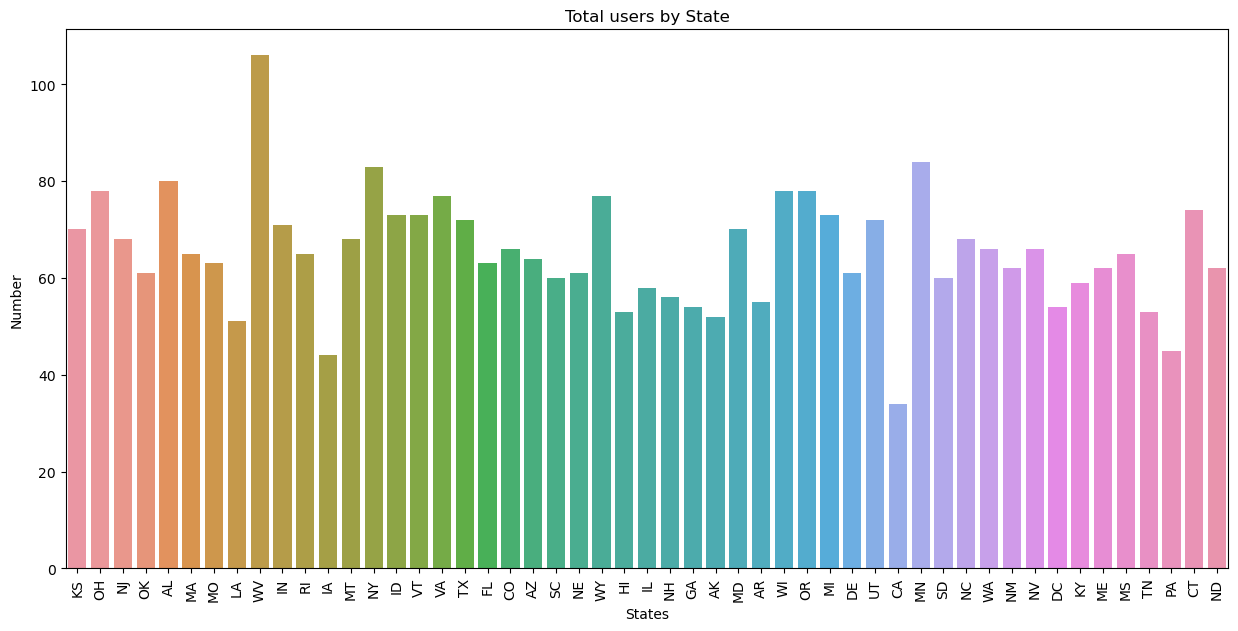

In [14]:
plt.figure(figsize=(15,7))     # drawing a countplot to see the number of customer from each state
ax = sns.countplot(data=df, x='state')

ax.set(title='Total users by State', xlabel='States', ylabel='Number')

plt.xticks(rotation='vertical')

plt.show()

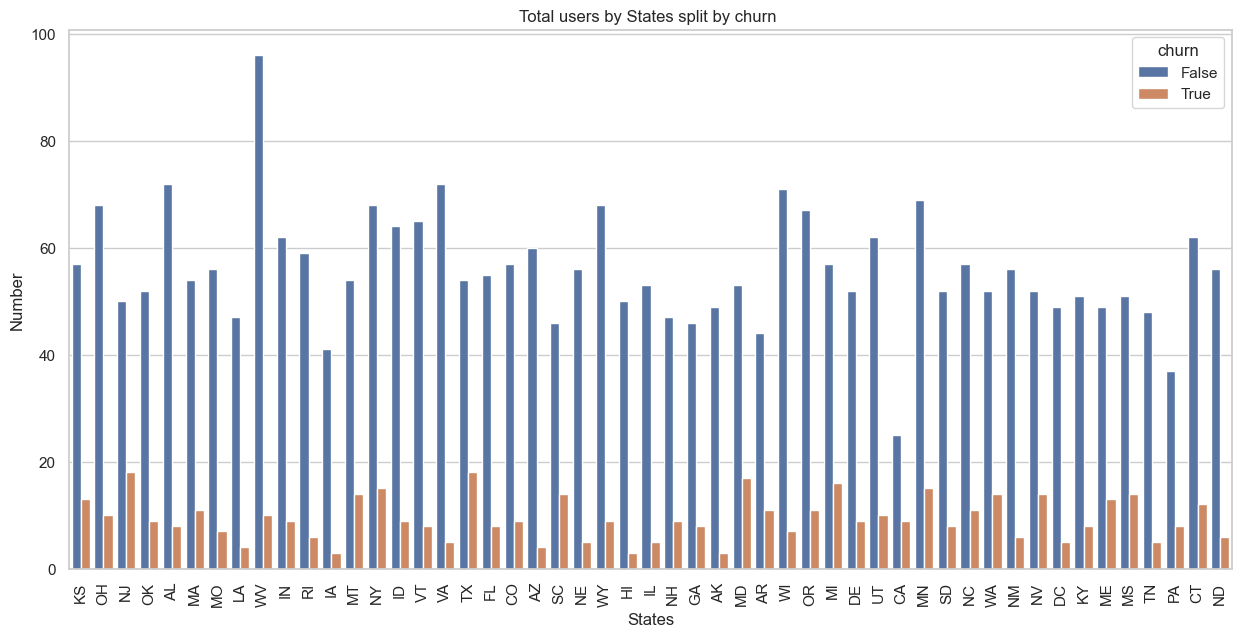

In [15]:
# countplot to see the churned and non-churned customer from each state

sns.set(style='whitegrid')

plt.figure(figsize=(15,7))
ax = sns.countplot(data=df, x='state', hue='churn')

plt.xticks(rotation='vertical')
ax.set(title='Total users by States split by churn ', xlabel='States', ylabel='Number')

plt.show()

In [79]:
states = df['state'].unique()      # getting all the unique states
states_mean = df.groupby('state')['churn'].mean()  # getting the churn rate for each state

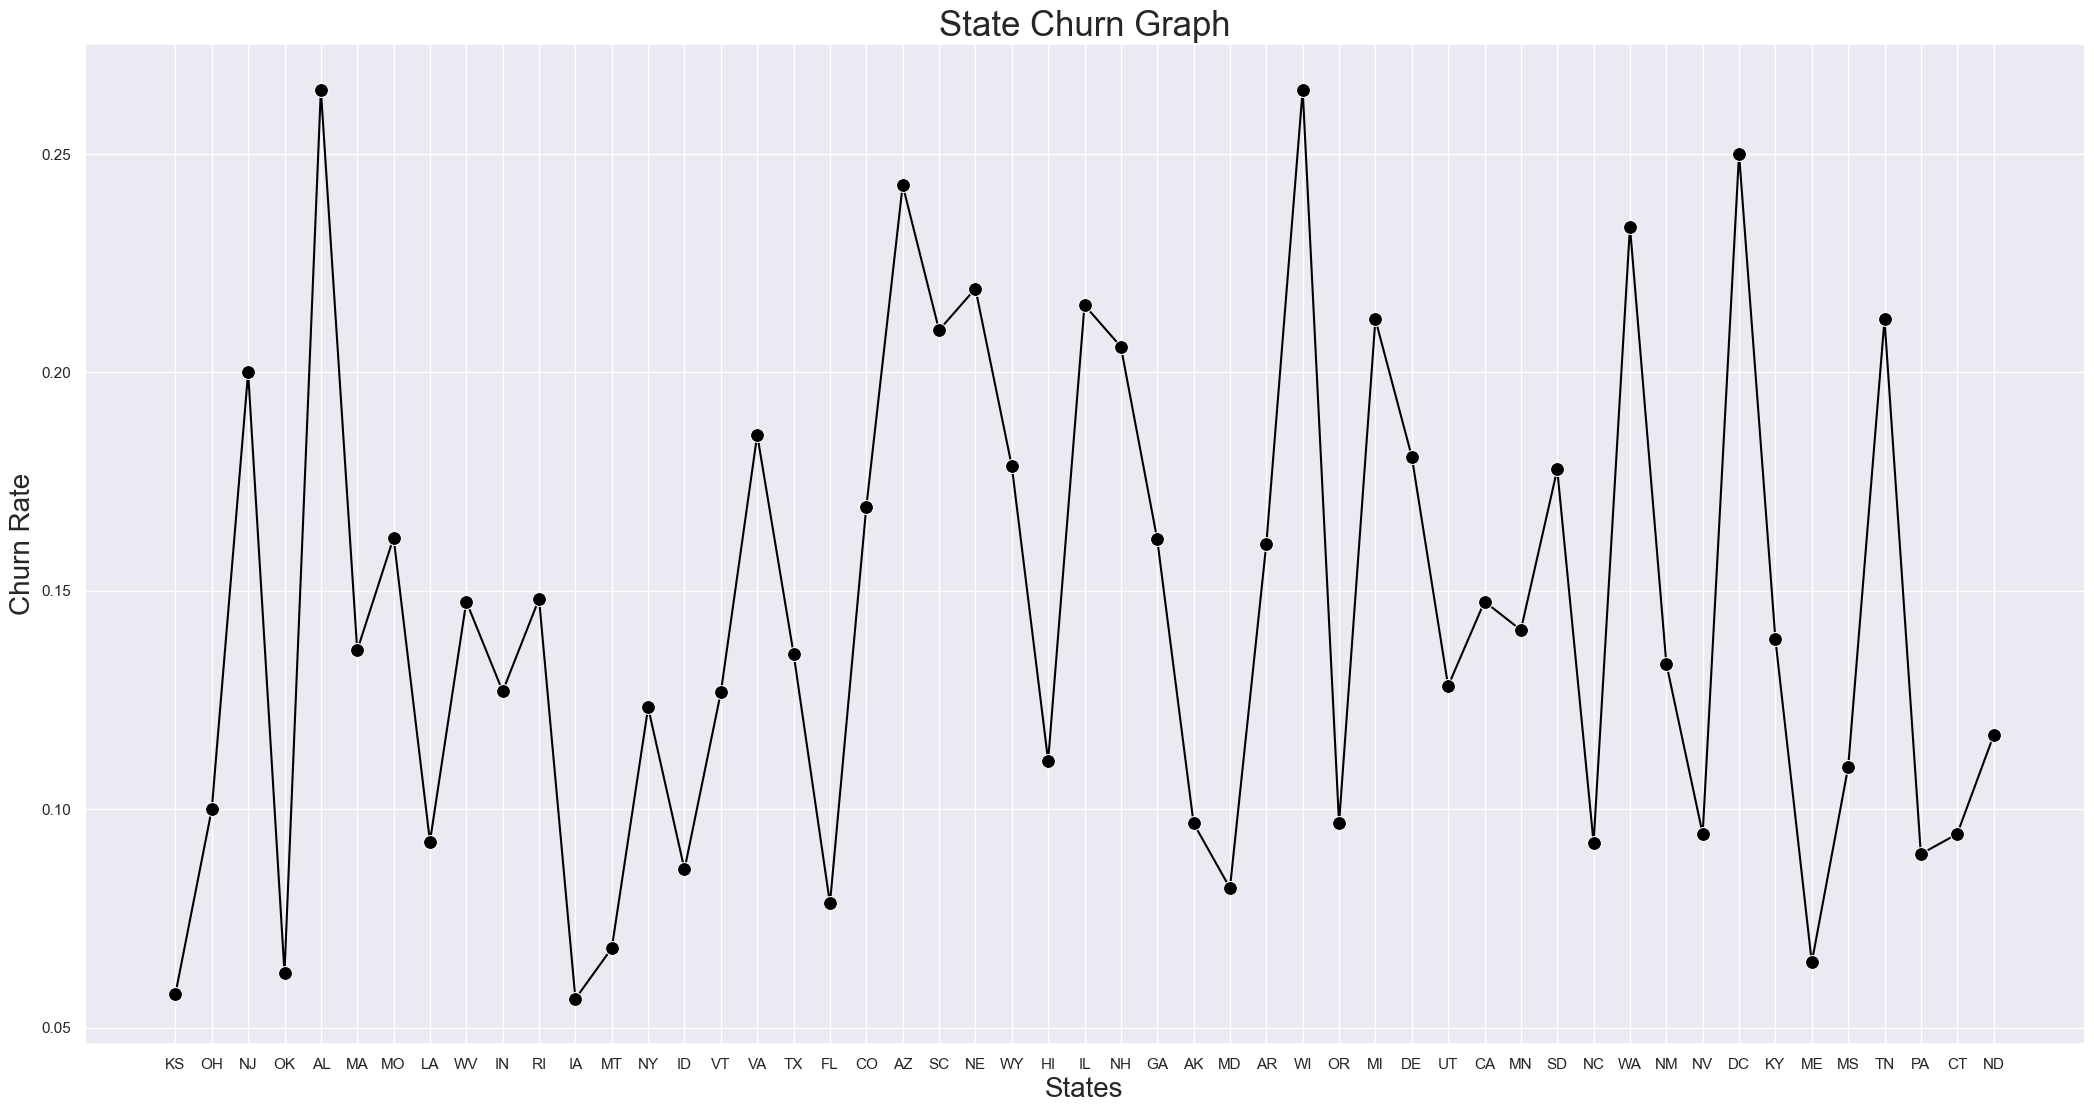

In [81]:
# making a line chart to show how churn rate vary from state to state
sns.set(style="darkgrid")

fig = plt.figure(figsize=(20,10))
ax = fig.add_axes([0,0,1,1])

sns.lineplot(x=states, y=states_mean, marker="o", markersize=10, color='black')

plt.title('State Churn Graph', fontsize=25)
plt.xlabel('States', fontsize=20)
plt.ylabel('Churn Rate', fontsize=20)

plt.show( )

In [17]:
c = pd.crosstab(df.state, df.churn, margins=True)

c['percentage_churn'] = c[True]/c['All']*100

c.sort_values('percentage_churn', ascending=False, inplace=True)

c.head()  # showing the top-5 state with highest churn.

churn,False,True,All,percentage_churn
state,,,,
CA,25,9,34,26.470588
NJ,50,18,68,26.470588
TX,54,18,72,25.000000
MD,53,17,70,24.285714
SC,46,14,60,23.333333


#### Conclusion: 

We can see that some states have churn rate as high as 25%. We need to work in these states and reduce the churn rate.

### 3. Analyzing Area Code column

In [22]:
area_ct = pd.crosstab(df['area code'], df['churn'], margins=True)
area_ct['percentage'] = area_ct[True]/area_ct['All']*100
area_ct

churn,False,True,All,percentage
area code,,,,
408,716,122,838,14.558473
415,1419,236,1655,14.259819
510,715,125,840,14.880952
All,2850,483,3333,14.491449


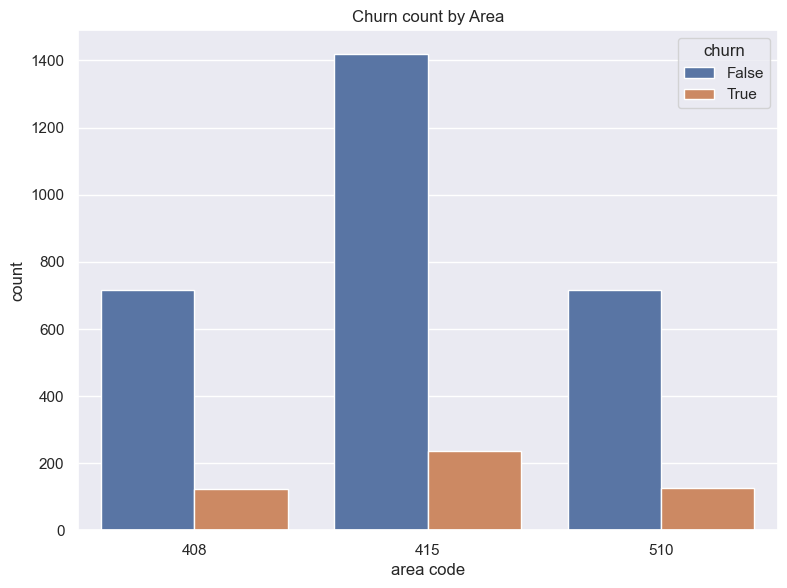

In [120]:
# making a countplot to see the churn and non-customer by area code to find any pattern

fig = plt.figure(figsize=(7,5))
ax = fig.add_axes([0,0,1,1])

sns.countplot(x=df['area code'], hue=df['churn'])


plt.title('Churn count by Area')

plt.show()

We cannot find any pattern based on Area Code. All the three Area have similar Churn Rate

### 4. Analyzing the 'Account Length' column

C:\Users\namra\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


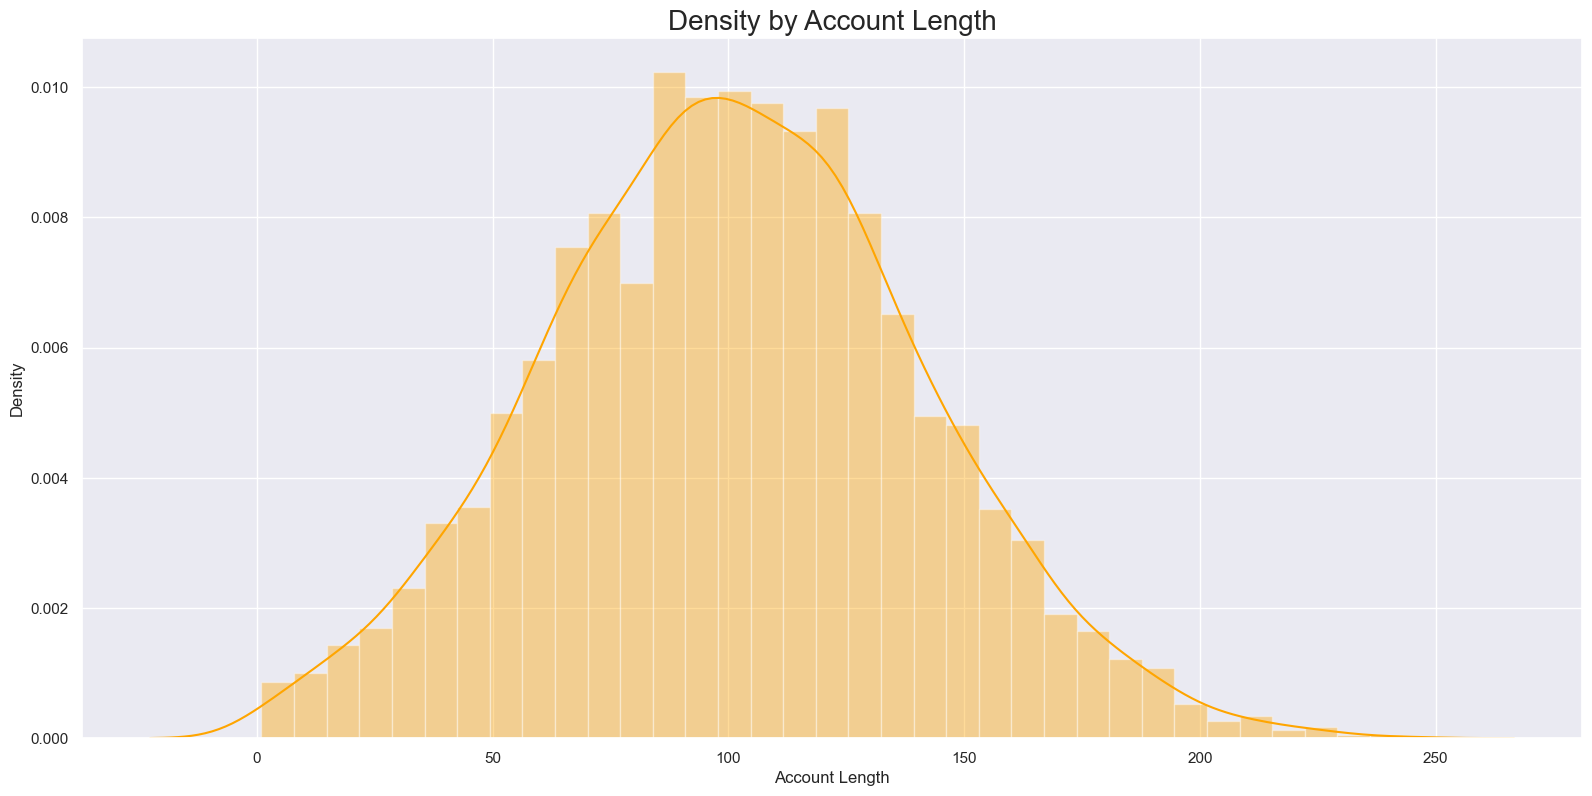

In [84]:
# making a distribution plot to see the number of account based on Account Length

fig = plt.figure(figsize=(15,7))
ax = fig.add_axes([0,0,1,1])
sns.distplot(x=df['account length'], color='orange')

plt.title('Density by Account Length', fontsize=20)
plt.xlabel('Account Length')

plt.show()

In [85]:
churn_df = df[df['churn']==True]   
not_churn_df = df[df['churn']==False]

# made 2 separate dataframes for churned data and non_churned data

C:\Users\namra\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\namra\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\namra\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an 

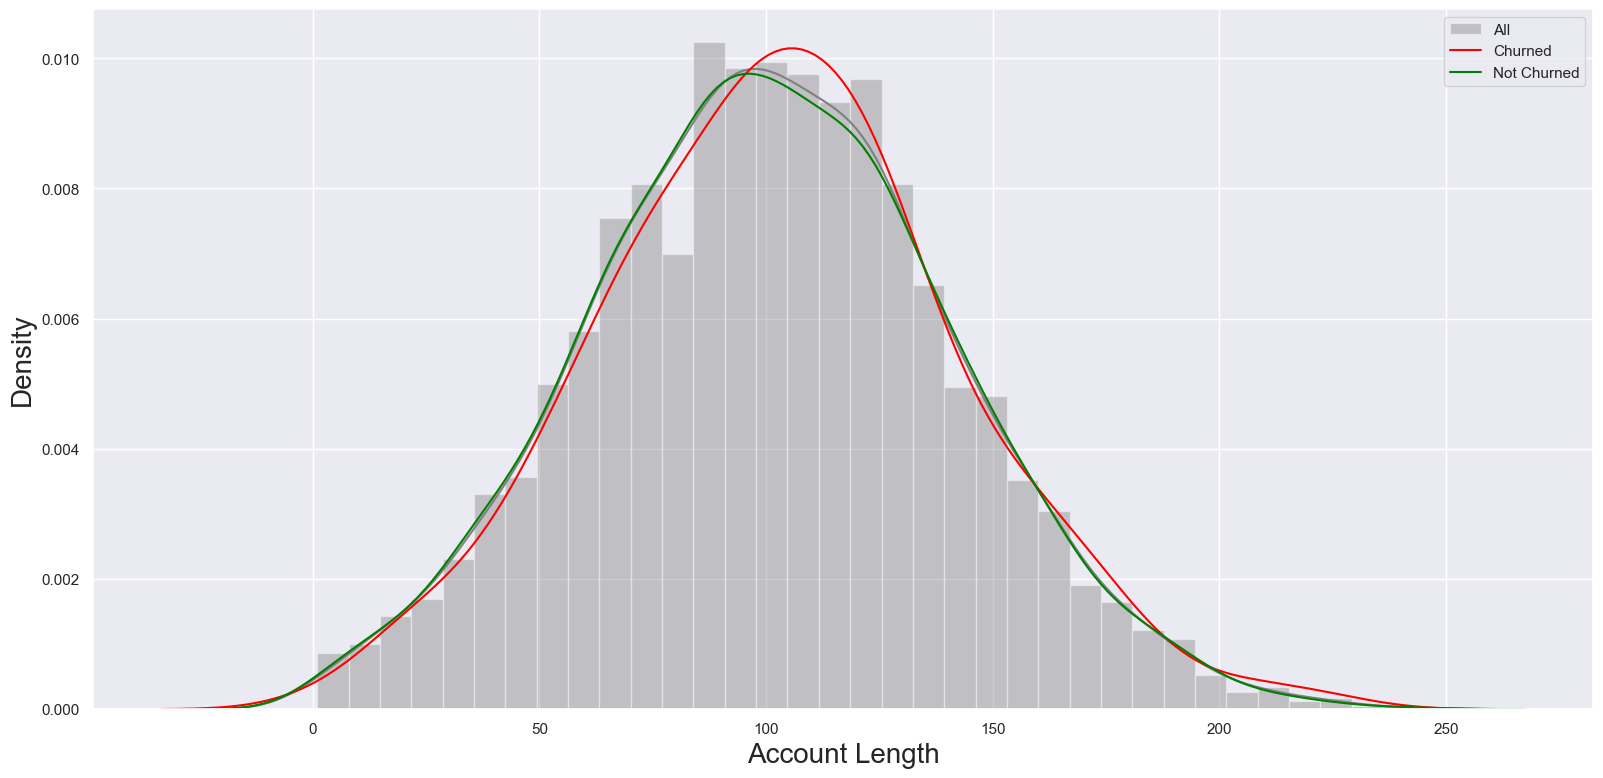

In [90]:
# making a distribution plot to see the churned and non-churned customers based on Account Lenght.
# we cant add hue arguement in the distplot so I have already created separate columns for churned and non-churned customers

fig = plt.figure(figsize=(15,7))
ax = fig.add_axes([0,0,1,1])

sns.distplot(x=df['account length'], color='Grey', label='All')
sns.distplot(x=churn_df['account length'], color='red', label='Churned', hist=False)
sns.distplot(x=not_churn_df['account length'], color='green', label='Not Churned', hist=False)

plt.legend(loc=1)
plt.xlabel('Account Length', fontsize=20)
plt.ylabel('Density', fontsize=20)

plt.show()

#### Conclusion:

We can see that Customers with Account Length between 100 and 150 are more likely to Churn

### 5. Analyzing the 'International Plan' column

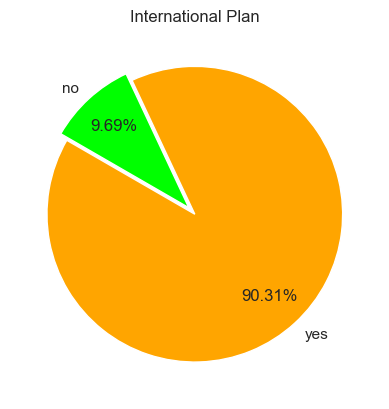

In [98]:
int_plan = df['international plan'].value_counts() # to show the counts of the unique values of international plan column

plt.pie(int_plan, labels=['yes', 'no'], colors=['orange', 'lime'], startangle=150, 
        autopct='%0.2f%%', pctdistance=0.75, explode=(0,0.06))

plt.title('International Plan')

plt.show()

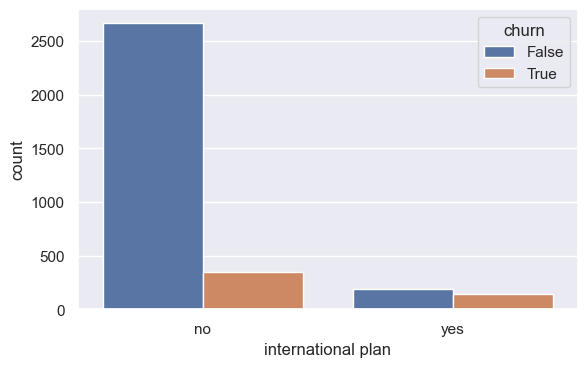

In [115]:

fig = plt.figure(figsize=(5,3))
ax = fig.add_axes([0,0,1,1])

sns.countplot(x='international plan', hue='churn', data=df)

plt.show()

In [122]:
# creating a crosstab table to show churned and non churned based on international plan

int_df =  pd.crosstab(df['international plan'], df['churn'], margins=True)  
int_df['percentage'] = int_df[True]/int_df['All']*100

int_df

churn,False,True,All,percentage
international plan,,,,
no,2664,346,3010,11.495017
yes,186,137,323,42.414861
All,2850,483,3333,14.491449


#### Conclusion:

We can notice that churn rate for customers with international plan is 42%, while the churn rate for customers without international plan is 12%.

We can improve the international plan services to reduce the churn rate

### 6. Analyzing 'Voice Mail Plan' column

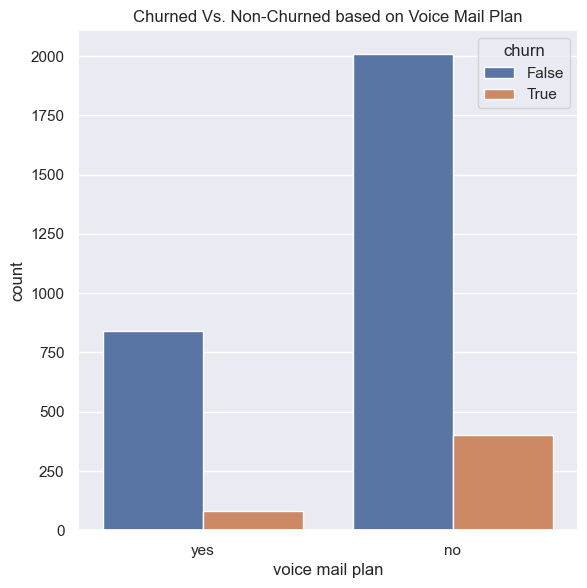

In [106]:
# creating a count plot to see customers split by Voice Mail Plan

fig = plt.figure(figsize=(5,5))
ax = fig.add_axes([0,0,1,1])

sns.countplot(x='voice mail plan', data= df, hue='churn')
plt.title('Churned Vs. Non-Churned based on Voice Mail Plan')
plt.show()

In [112]:
vm = df['voice mail plan'].value_counts()

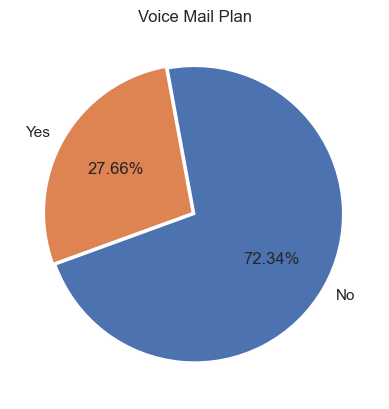

In [40]:
plt.pie(vm, labels=['No', 'Yes'], startangle=200, autopct='%0.2f%%', explode=(0,0.02))
plt.title('Voice Mail Plan')

plt.show()

In [102]:
# creating a cross table to see the churned and non-churned customers split by Voice Mail Plan
voice_mail_ct = pd.crosstab(df['voice mail plan'], df['churn'], margins=True) 

voice_mail_ct['percentage'] = voice_mail_ct[True]/voice_mail_ct['All']*100

voice_mail_ct

churn,False,True,All,percentage
voice mail plan,,,,
no,2008,403,2411,16.715056
yes,842,80,922,8.676790
All,2850,483,3333,14.491449


#### We can notice that Churn Rate for customers with Voice Mail Plan is double than the customers without Voice Mail Plan.

We can improve Voice Mail services to retain these customers

### 7. Analyzing the Number Vmail Messages column

C:\Users\namra\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


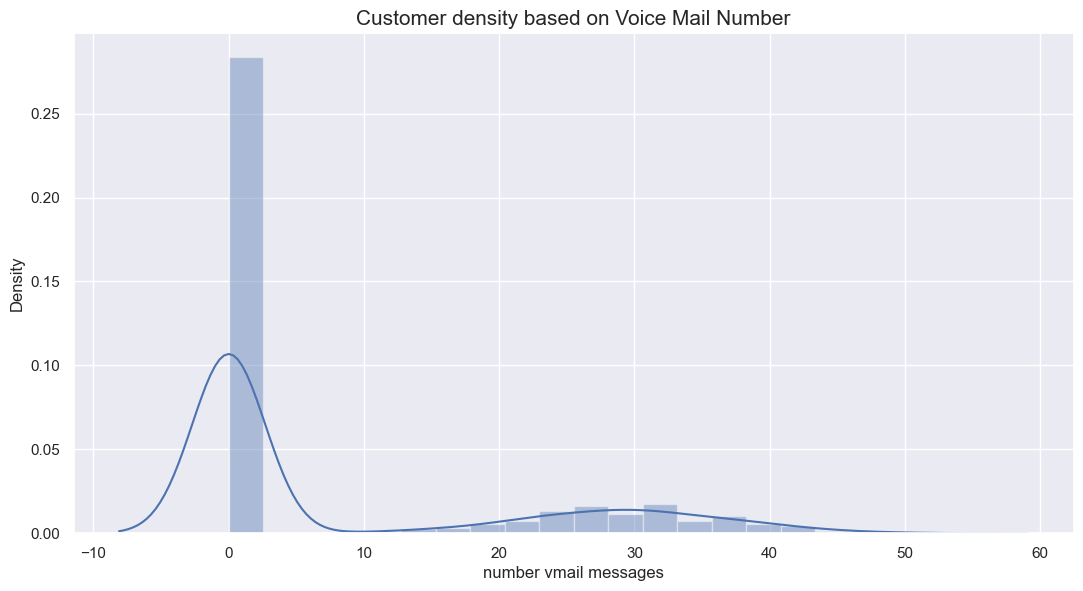

In [108]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_axes([0,0,1,1])

sns.distplot(df['number vmail messages'])
plt.title('Customer density based on Voice Mail Number', fontsize=15)

plt.show()

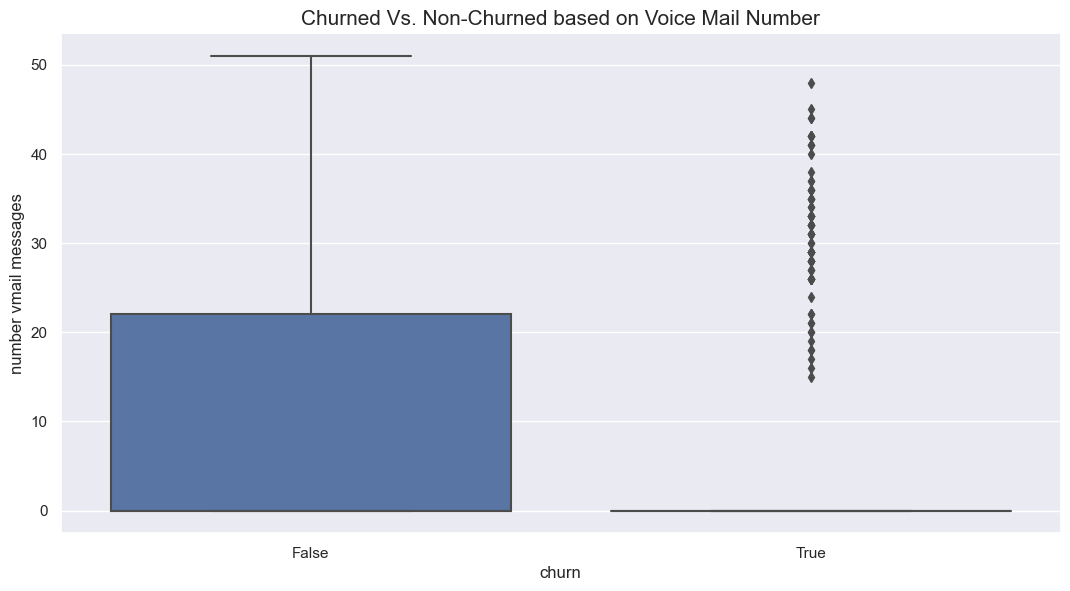

In [109]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_axes([0,0,1,1])

sns.boxplot(x='churn', y='number vmail messages', data=df)
plt.title('Churned Vs. Non-Churned based on Voice Mail Number', fontsize=15)
plt.show()

### 7. Analyzing Customer Service Calls column

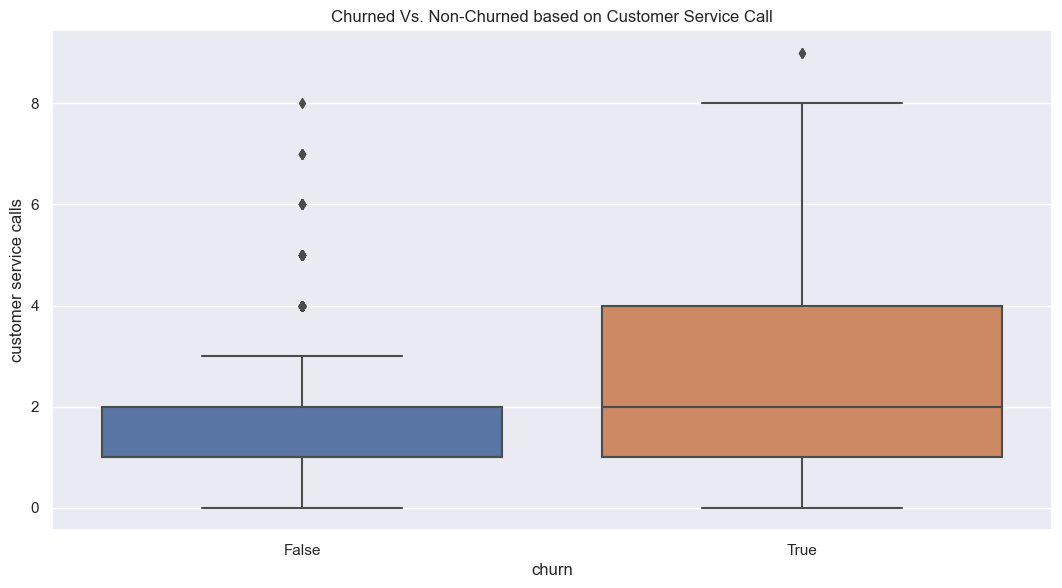

In [110]:
# Creating a box plot to see the customer service calls based on churn
fig = plt.figure(figsize=(10,5))
ax = fig.add_axes([0,0,1,1])

sns.boxplot(x='churn', y='customer service calls', data=df)
plt.title('Churned Vs. Non-Churned based on Customer Service Call')

plt.show()

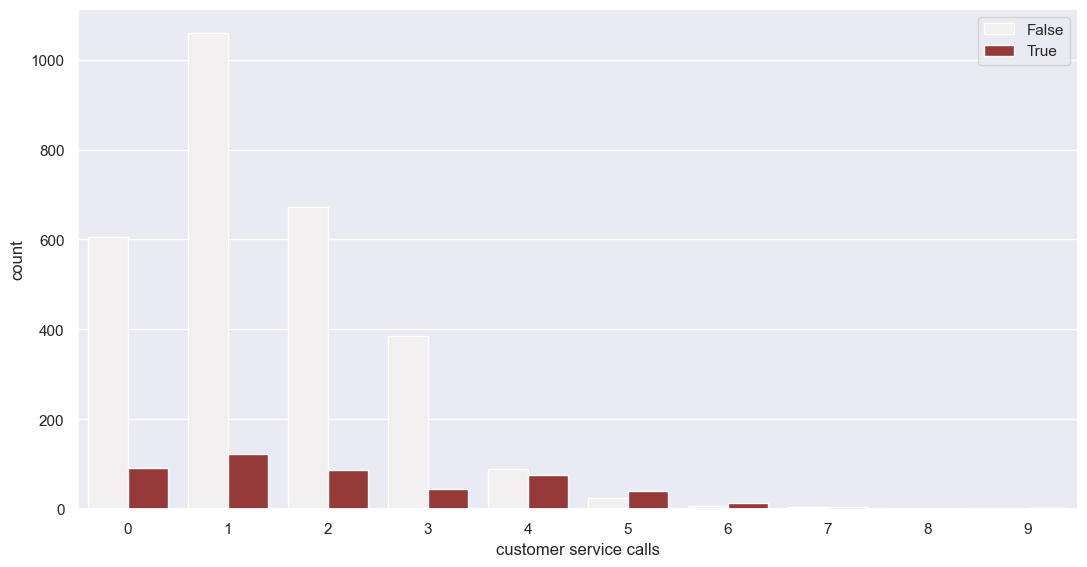

In [116]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_axes([0,0,1,1])

sns.countplot(x='customer service calls', hue='churn', data=df, color='brown')

plt.legend(loc=1)

plt.show()

In [111]:
cs_data = pd.crosstab(df['customer service calls'], df['churn'], margins=True)
cs_data['churn pct'] = cs_data[True]/cs_data['All']*100

cs_data

churn,False,True,All,churn pct
customer service calls,,,,
0,605,92,697,13.199426
1,1059,122,1181,10.330229
2,672,87,759,11.462451
3,385,44,429,10.256410
4,90,76,166,45.783133
5,26,40,66,60.606061
6,8,14,22,63.636364
7,4,5,9,55.555556
8,1,1,2,50.000000


#### Conclusion:

We can see that customers who have made 4 or more calls to customer service have 45-60% churn rate whereas customers who have made less than 4 calls have 10-12% churn rate.

We need to work on providing better customer service.